In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
with open('Results/venus_2023.txt') as f:
    pred_coordinates = np.empty((0, 3))
    lines = f.readlines()
    for line in lines:
        pred_coordinates = np.vstack((pred_coordinates, np.array(line.split()).astype(np.float128)))

target_coordinates = np.empty((0, 3))

with open('RawData/horizons_results_target.csv') as f:
    for line in f:
        line = line.strip().split(',')
        position = np.array(list(map(np.float128, line)))
        target_coordinates = np.vstack((target_coordinates, position))

target_coordinates = target_coordinates[:len(pred_coordinates)]

In [8]:
#convert to AU
target_coordinates = target_coordinates / 149597870.7
pred_coordinates = pred_coordinates / 149597870.7

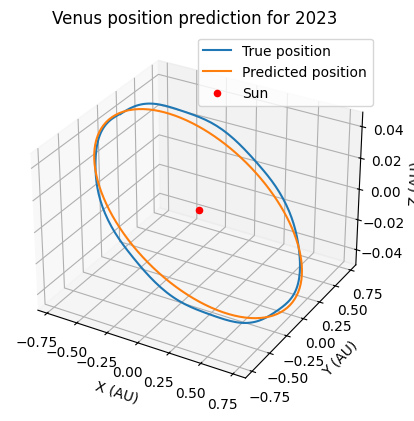

In [12]:
#plot both the target and the prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(target_coordinates[:,0], target_coordinates[:,1], target_coordinates[:,2], label='True position')
ax.plot(pred_coordinates[:,0], pred_coordinates[:,1], pred_coordinates[:,2], label='Predicted position')
ax.scatter(0, 0, 0, c='red', label='Sun')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('Venus position prediction for 2023')
ax.legend()
plt.show()